In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv', parse_dates=[0])

In [4]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [5]:
df.head()

,ds,y
0,2007-12-10,14629
1,2007-12-11,5012
2,2007-12-12,3582
3,2007-12-13,3205
4,2007-12-14,2680


In [7]:
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


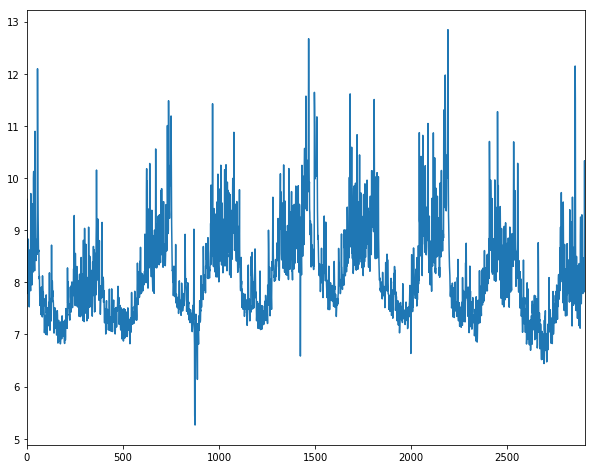

In [9]:
fig, axis = plt.subplots(figsize=(10, 8))
df.y.plot(ax=axis)
plt.show()

In [10]:
m = Prophet()
m.fit(df);

In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.205065,7.432525,8.906258
3266,2017-01-16,8.530088,7.841461,9.246767
3267,2017-01-17,8.317468,7.543096,9.007260
3268,2017-01-18,8.150081,7.425804,8.781735
3269,2017-01-19,8.162015,7.424642,8.903520


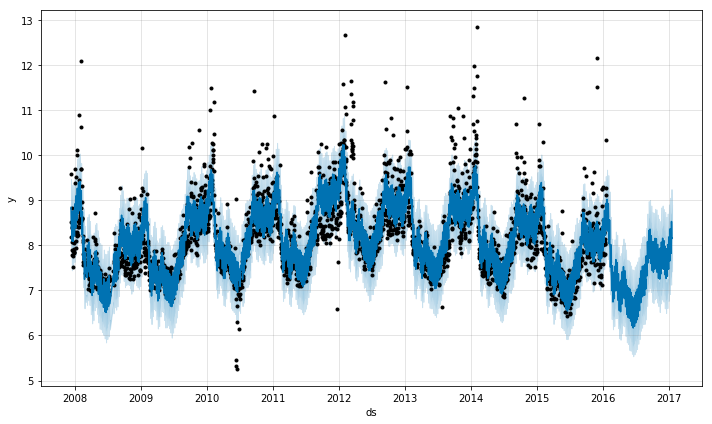

In [13]:
m.plot(forecast);

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.DataFrame.from_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv', parse_dates=[0], index_col=[0])

In [38]:
df.head()

,y
ds,
2007-12-10,14629
2007-12-11,5012
2007-12-12,3582
2007-12-13,3205
2007-12-14,2680


In [46]:
df.y

2007-12-10    14629
2007-12-11     5012
2007-12-12     3582
2007-12-13     3205
2007-12-14     2680
2007-12-15     2401
2007-12-16     4510
2007-12-17     6831
2007-12-18     4370
2007-12-19     3196
2007-12-20     2642
2007-12-21     2349
2007-12-22     1862
2007-12-23     4382
2007-12-24     5542
2007-12-25     2572
2007-12-26     2576
2007-12-27     3140
2007-12-28     2770
2007-12-29     2536
2007-12-30    16369
2007-12-31    11920
2008-01-01     3999
2008-01-02     4604
2008-01-03     3874
2008-01-04     3317
2008-01-05     2836
2008-01-06    13484
2008-01-07     6952
2008-01-08     4585
              ...  
2015-12-22     3329
2015-12-23     2381
2015-12-24     1552
2015-12-25     1483
2015-12-26     1237
2015-12-27     7178
2015-12-28    10411
2015-12-29    10383
2015-12-30     4409
2015-12-31     2995
2016-01-01     1977
2016-01-02     2503
2016-01-03     3825
2016-01-04    10885
2016-01-05     5262
2016-01-06     4241
2016-01-07     4007
2016-01-08     3985
2016-01-09     2406


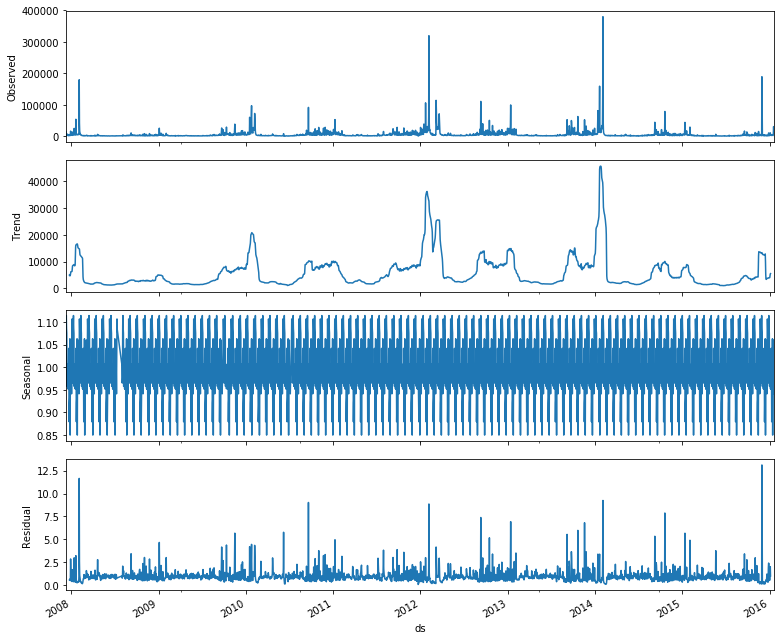

In [89]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.DataFrame.from_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_wp_peyton_manning.csv', parse_dates=[0], index_col=[0])
result = seasonal_decompose(df, model='multiplicative', freq=30).plot()

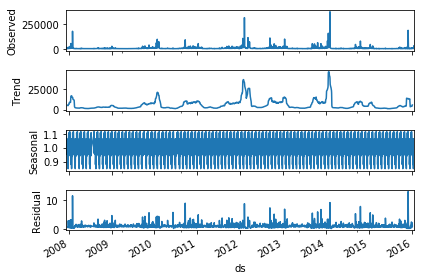

In [69]:
sd = seasonal_decompose(df, model='multiplicative', freq=30)
sdplot = sd.plot()

In [ ]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()

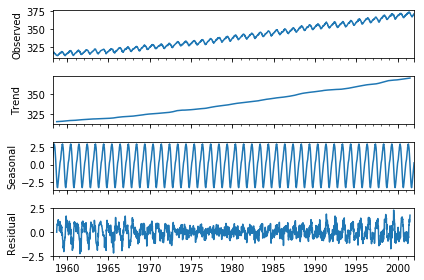

In [20]:
import statsmodels.api as sm

dta = sm.datasets.co2.load_pandas().data
# deal with missing values. see issue
dta.co2.interpolate(inplace=True)

res = sm.tsa.seasonal_decompose(dta.co2)
resplot = res.plot()

In [48]:
dta.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [31]:
dta.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [45]:
dta.dtypes

co2    float64
dtype: object